In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

20 features

In [15]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['PH', 'Participant ID', 'Age'])
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 23)
Testing set size: (1029, 23)
Overlap in Participant ID column: set()


In [16]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [17]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 9}
Best SVM Parameters: {'C': 10, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 10, 'n_estimators': 200}



== KNN Model ==
Accuracy: 0.7920310981535471
AUC: 0.8572671098707447
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       498
           1       0.82      0.76      0.79       531

    accuracy                           0.79      1029
   macro avg       0.79      0.79      0.79      1029
weighted avg       0.79      0.79      0.79      1029



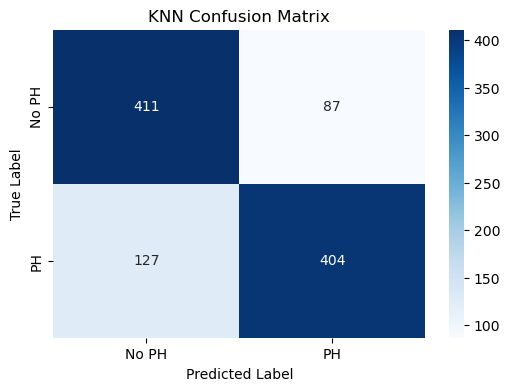

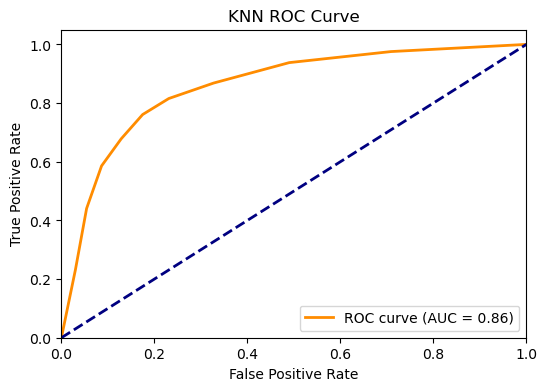


== SVM Model ==
Accuracy: 0.8075801749271136
AUC: 0.8713573692131993
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       498
           1       0.82      0.80      0.81       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



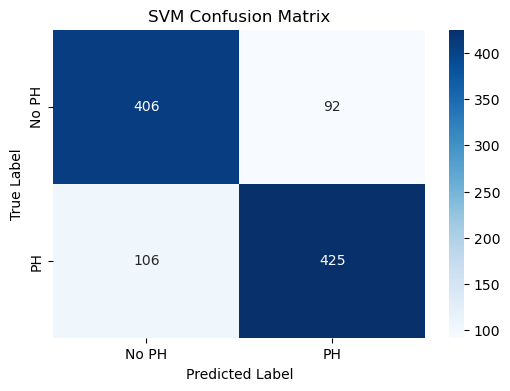

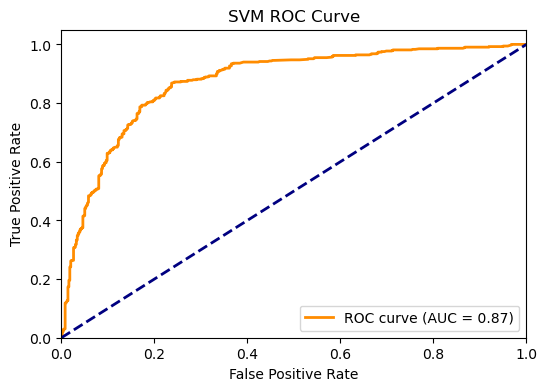


== RF Model ==
Accuracy: 0.8046647230320699
AUC: 0.8813559322033899
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       498
           1       0.83      0.79      0.81       531

    accuracy                           0.80      1029
   macro avg       0.81      0.81      0.80      1029
weighted avg       0.81      0.80      0.80      1029



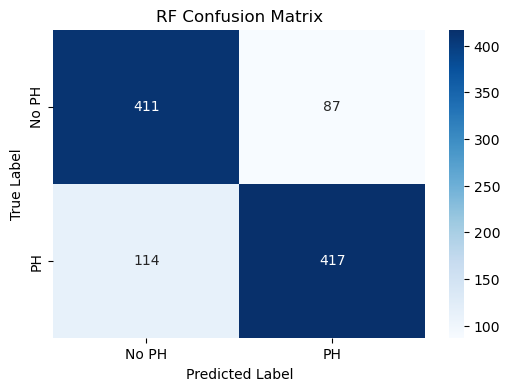

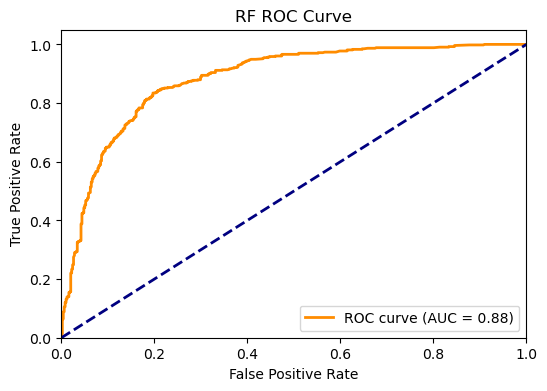

In [18]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 10

In [4]:
top_10_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction',
    'Hypercholesterolemia',
    'Ischaemic heart disease',
    'Chronic kidney disease'
]

In [5]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_10_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 10)
Testing set size: (1029, 10)
Overlap in Participant ID column: set()


In [6]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [7]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 5}
Best SVM Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 200}



== KNN Model ==
Accuracy: 0.7813411078717201
AUC: 0.8288842753310794
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       498
           1       0.81      0.76      0.78       531

    accuracy                           0.78      1029
   macro avg       0.78      0.78      0.78      1029
weighted avg       0.78      0.78      0.78      1029



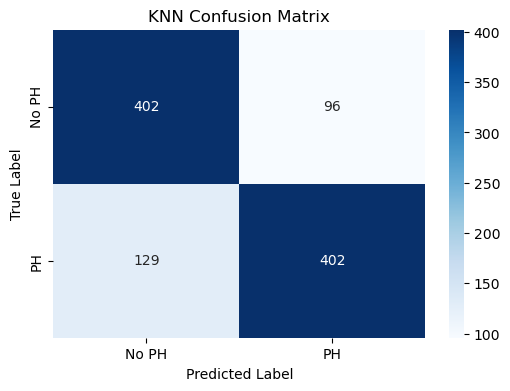

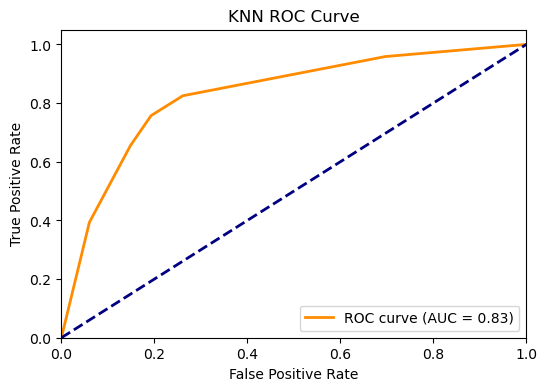


== SVM Model ==
Accuracy: 0.8124392614188533
AUC: 0.8664942254895288
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       498
           1       0.81      0.82      0.82       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



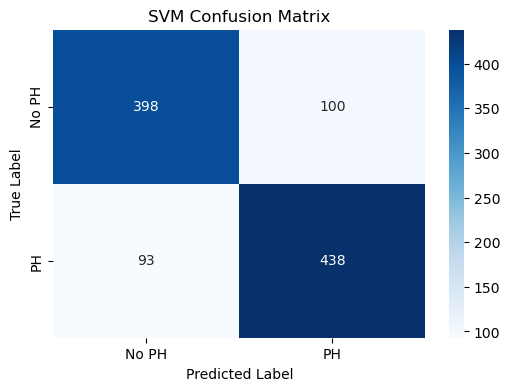

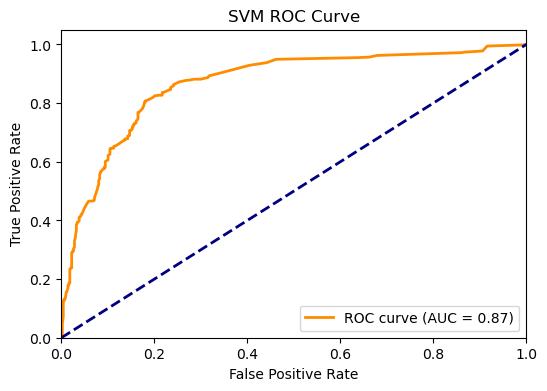


== RF Model ==
Accuracy: 0.7998056365403304
AUC: 0.8783476656153806
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       498
           1       0.82      0.78      0.80       531

    accuracy                           0.80      1029
   macro avg       0.80      0.80      0.80      1029
weighted avg       0.80      0.80      0.80      1029



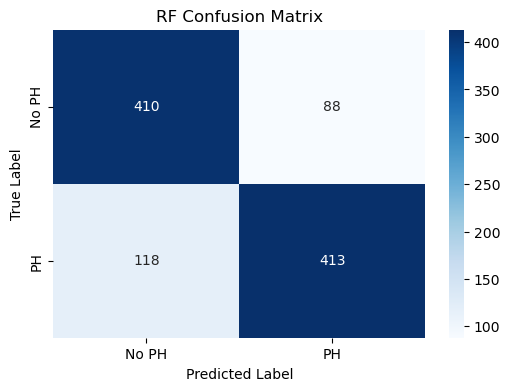

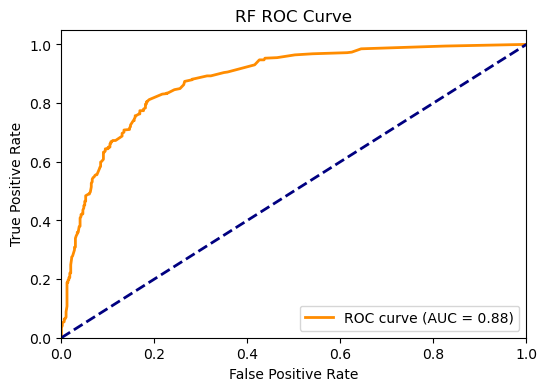

In [8]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()


Top 8

In [9]:
top_8_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction',
    'Hypercholesterolemia'
]

In [10]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_8_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 8)
Testing set size: (1029, 8)
Overlap in Participant ID column: set()


In [11]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [12]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 7}
Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 200}



== KNN Model ==
Accuracy: 0.8007774538386784
AUC: 0.8581236433492917
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       498
           1       0.81      0.80      0.81       531

    accuracy                           0.80      1029
   macro avg       0.80      0.80      0.80      1029
weighted avg       0.80      0.80      0.80      1029



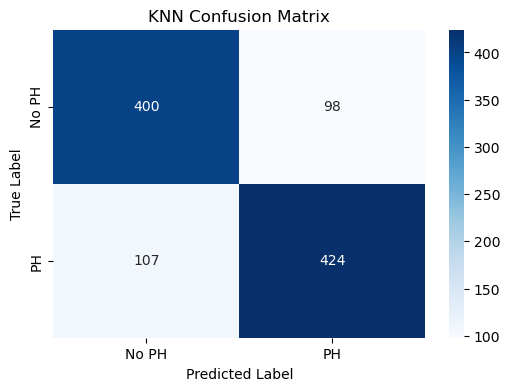

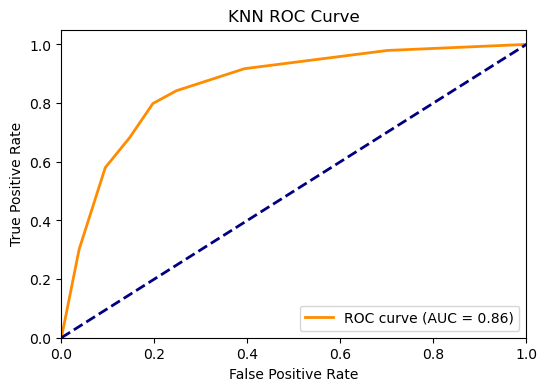


== SVM Model ==
Accuracy: 0.8095238095238095
AUC: 0.8542739697017827
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       498
           1       0.82      0.81      0.81       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



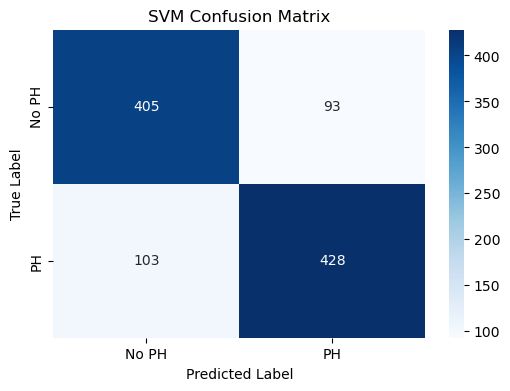

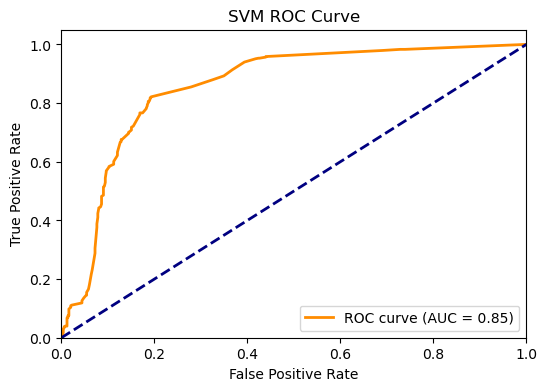


== RF Model ==
Accuracy: 0.8036929057337221
AUC: 0.8776669767582572
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       498
           1       0.82      0.79      0.81       531

    accuracy                           0.80      1029
   macro avg       0.80      0.80      0.80      1029
weighted avg       0.80      0.80      0.80      1029



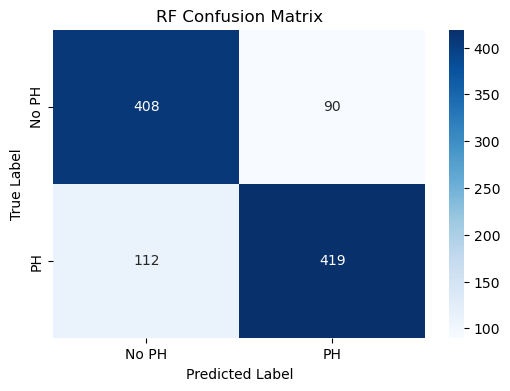

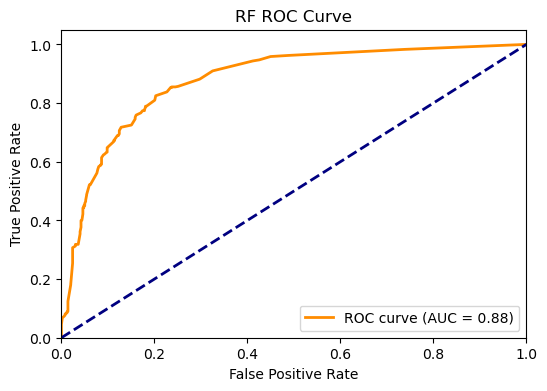

In [13]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 9

In [59]:
top_9_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction',
    'Hypercholesterolemia',
    'Ischaemic heart disease'
]

In [60]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_9_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 9)
Testing set size: (1029, 9)
Overlap in Participant ID column: set()


In [54]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [61]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 7}
Best SVM Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 100}



== KNN Model ==
Accuracy: 0.7881438289601554
AUC: 0.8468242083210431
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       498
           1       0.82      0.76      0.79       531

    accuracy                           0.79      1029
   macro avg       0.79      0.79      0.79      1029
weighted avg       0.79      0.79      0.79      1029



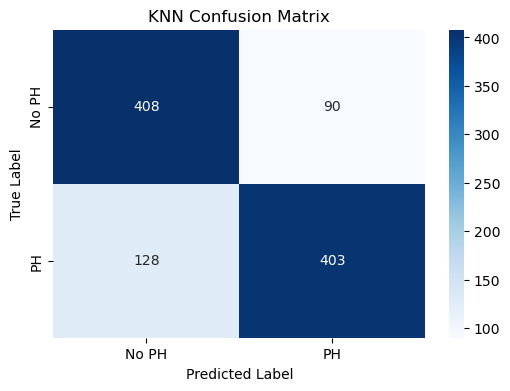

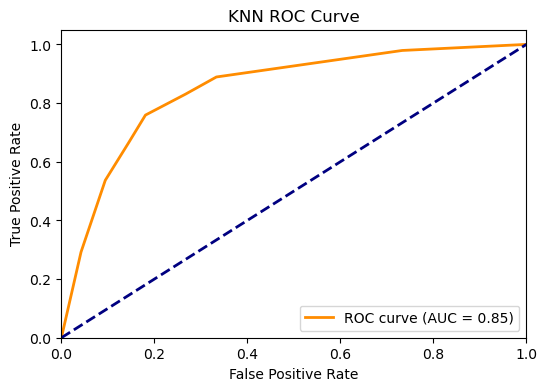


== SVM Model ==
Accuracy: 0.8114674441205053
AUC: 0.8597894402468632
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       498
           1       0.81      0.83      0.82       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



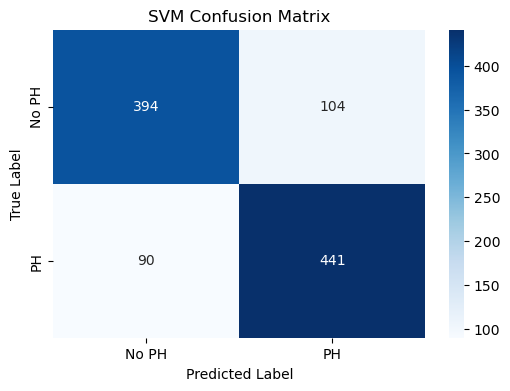

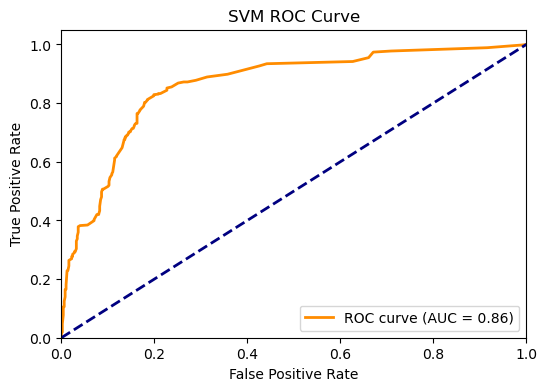


== RF Model ==
Accuracy: 0.7978620019436345
AUC: 0.8783835908606177
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       498
           1       0.82      0.78      0.80       531

    accuracy                           0.80      1029
   macro avg       0.80      0.80      0.80      1029
weighted avg       0.80      0.80      0.80      1029



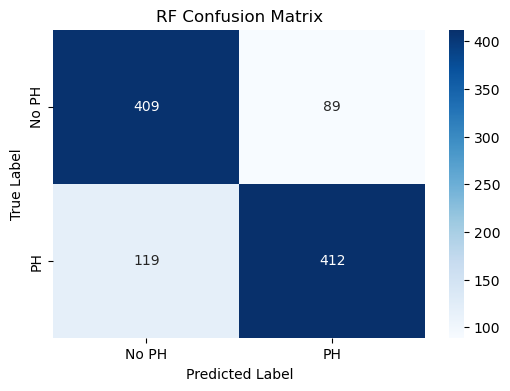

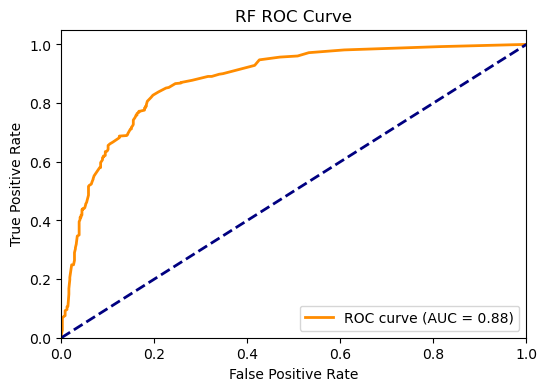

In [62]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 5

In [63]:
top_5_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease'
]

In [64]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_5_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 5)
Testing set size: (1029, 5)
Overlap in Participant ID column: set()


In [65]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [66]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 5}
Best SVM Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 100}



== KNN Model ==
Accuracy: 0.7755102040816326
AUC: 0.8310265544286374
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       498
           1       0.82      0.72      0.77       531

    accuracy                           0.78      1029
   macro avg       0.78      0.78      0.78      1029
weighted avg       0.78      0.78      0.78      1029



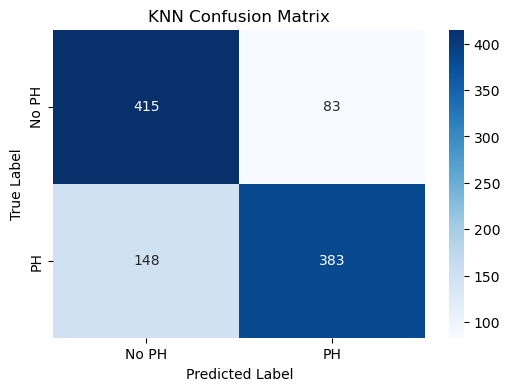

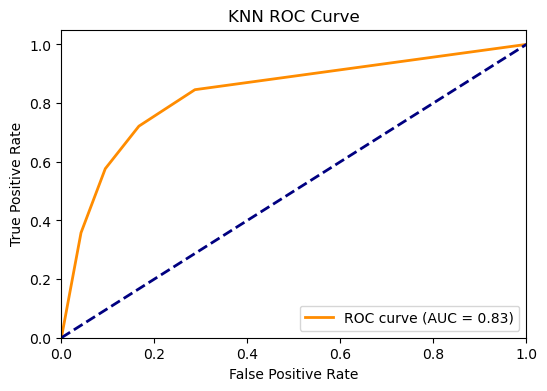


== SVM Model ==
Accuracy: 0.7949465500485908
AUC: 0.837113047292749
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       498
           1       0.82      0.77      0.79       531

    accuracy                           0.79      1029
   macro avg       0.80      0.80      0.79      1029
weighted avg       0.80      0.79      0.79      1029



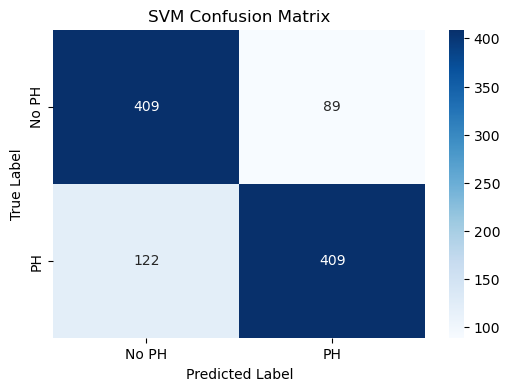

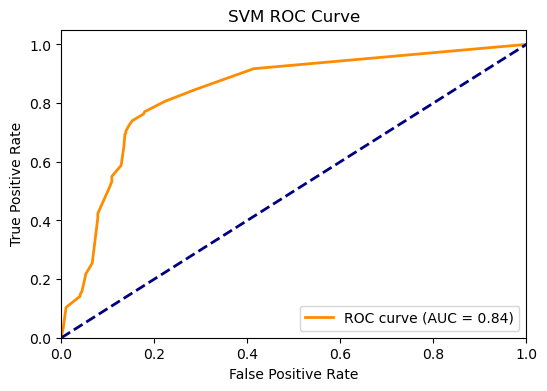


== RF Model ==
Accuracy: 0.7949465500485908
AUC: 0.8570723572255121
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       498
           1       0.82      0.77      0.79       531

    accuracy                           0.79      1029
   macro avg       0.80      0.80      0.79      1029
weighted avg       0.80      0.79      0.79      1029



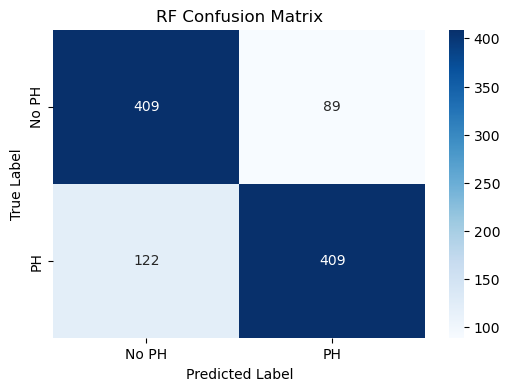

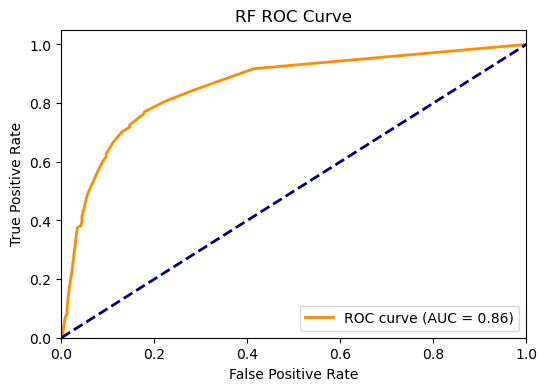

In [67]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 4

In [68]:
top_4_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD'
]

In [69]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_4_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 4)
Testing set size: (1029, 4)
Overlap in Participant ID column: set()


In [70]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [71]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 7}
Best SVM Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 100}



== KNN Model ==
Accuracy: 0.7648202137998056
AUC: 0.8050393665055703
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       498
           1       0.76      0.79      0.78       531

    accuracy                           0.76      1029
   macro avg       0.77      0.76      0.76      1029
weighted avg       0.77      0.76      0.76      1029



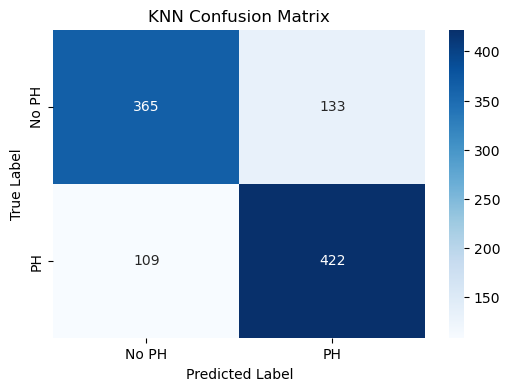

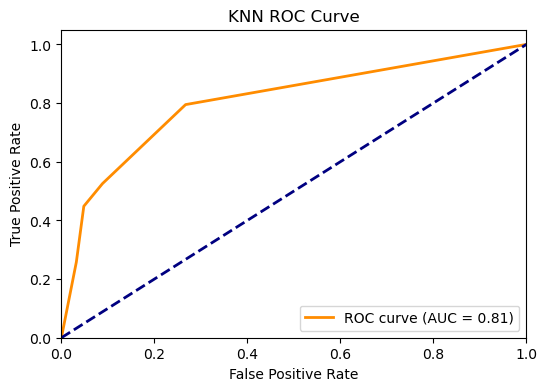


== SVM Model ==
Accuracy: 0.7667638483965015
AUC: 0.8173352543885524
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       498
           1       0.83      0.69      0.75       531

    accuracy                           0.77      1029
   macro avg       0.77      0.77      0.77      1029
weighted avg       0.78      0.77      0.77      1029



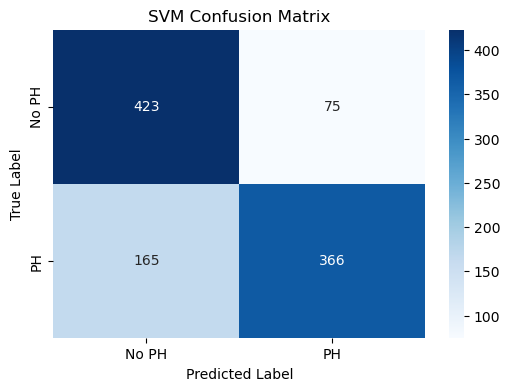

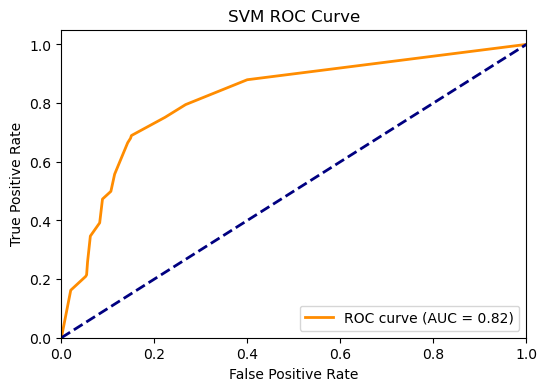


== RF Model ==
Accuracy: 0.7667638483965015
AUC: 0.833229339202384
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       498
           1       0.83      0.69      0.75       531

    accuracy                           0.77      1029
   macro avg       0.77      0.77      0.77      1029
weighted avg       0.78      0.77      0.77      1029



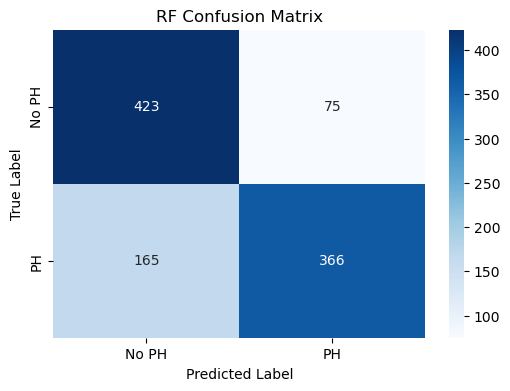

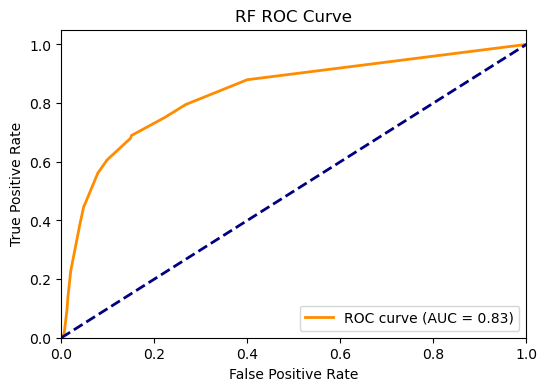

In [72]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 7

In [73]:
top_7_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction'
]

In [74]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_7_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))


Training set size: (4113, 7)
Testing set size: (1029, 7)
Overlap in Participant ID column: set()


In [75]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [76]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 9}
Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 10, 'n_estimators': 300}



== KNN Model ==
Accuracy: 0.7910592808551993
AUC: 0.847087029851988
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       498
           1       0.81      0.78      0.79       531

    accuracy                           0.79      1029
   macro avg       0.79      0.79      0.79      1029
weighted avg       0.79      0.79      0.79      1029



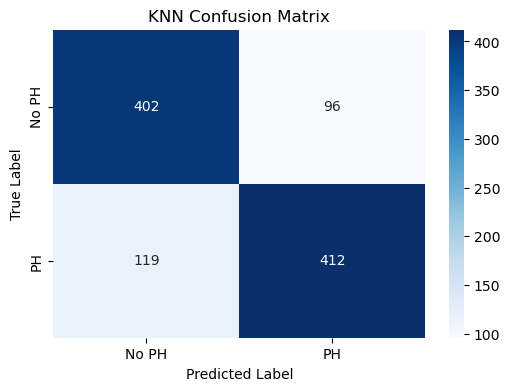

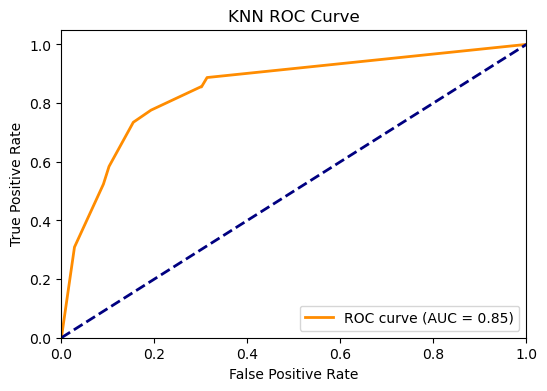


== SVM Model ==
Accuracy: 0.8095238095238095
AUC: 0.8519577367851822
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       498
           1       0.82      0.81      0.81       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



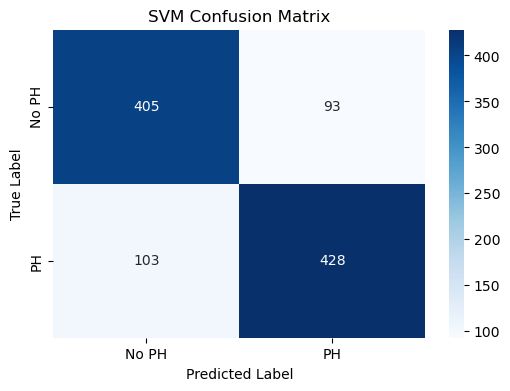

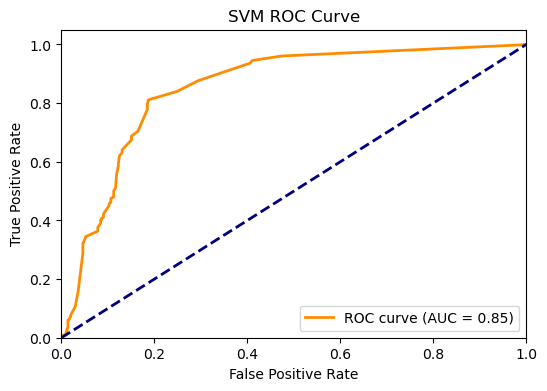


== RF Model ==
Accuracy: 0.8085519922254616
AUC: 0.8755038988345094
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       498
           1       0.82      0.80      0.81       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



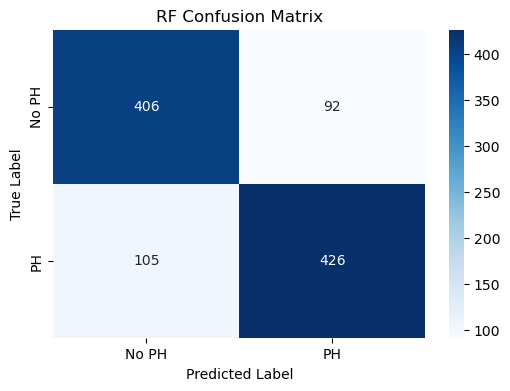

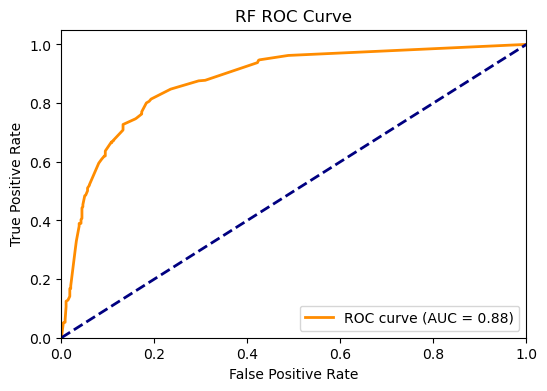

In [77]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 6 

In [81]:
top_6_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism'
]

In [82]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_6_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 6)
Testing set size: (1029, 6)
Overlap in Participant ID column: set()


In [83]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [79]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 9}
Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 10, 'n_estimators': 300}



== KNN Model ==
Accuracy: 0.7910592808551993
AUC: 0.847087029851988
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       498
           1       0.81      0.78      0.79       531

    accuracy                           0.79      1029
   macro avg       0.79      0.79      0.79      1029
weighted avg       0.79      0.79      0.79      1029



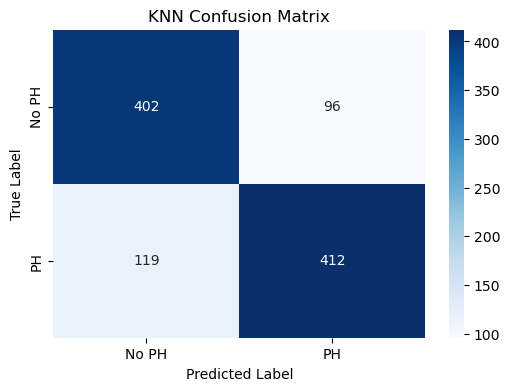

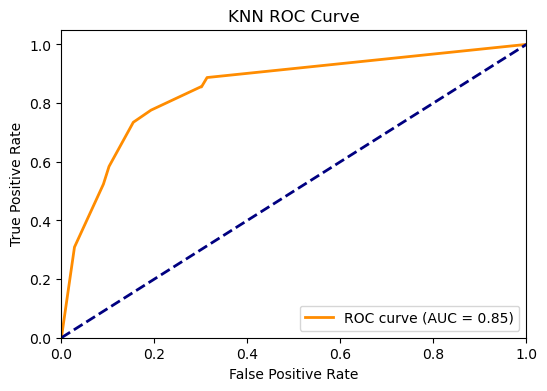


== SVM Model ==
Accuracy: 0.8095238095238095
AUC: 0.8519577367851822
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       498
           1       0.82      0.81      0.81       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



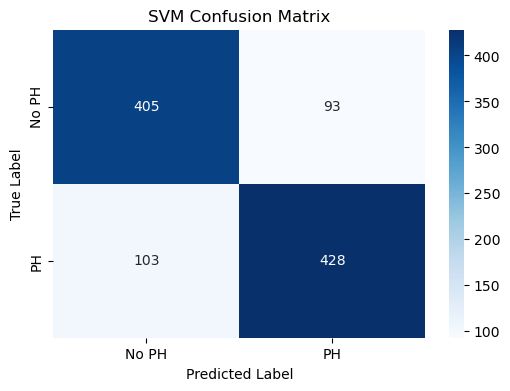

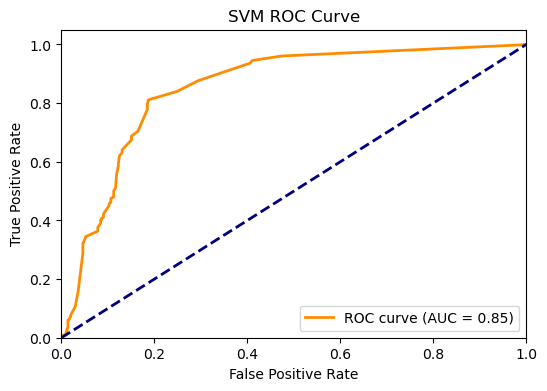


== RF Model ==
Accuracy: 0.8085519922254616
AUC: 0.8755038988345094
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       498
           1       0.82      0.80      0.81       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



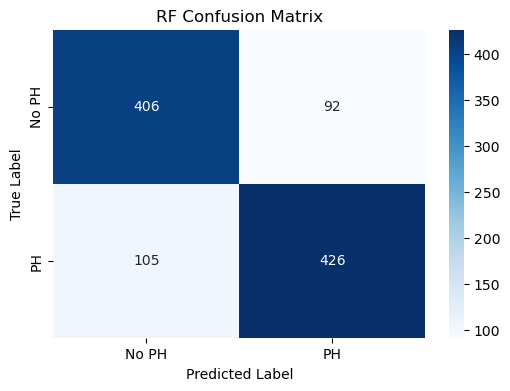

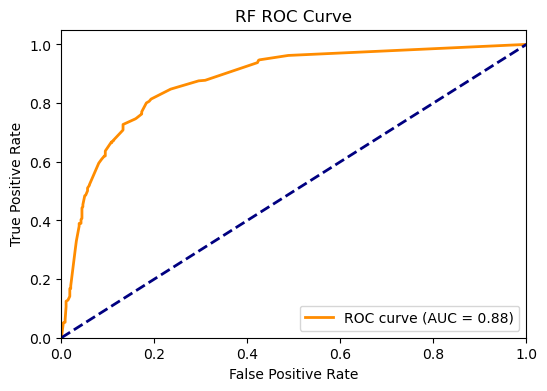

In [80]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 11

In [94]:
top_11_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction',
    'Hypercholesterolemia',
    'Ischaemic heart disease',
    'Chronic kidney disease',
    'Asthma'
]


In [95]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_11_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 11)
Testing set size: (1029, 11)
Overlap in Participant ID column: set()


In [96]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [97]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)


Best KNN Parameters: {'n_neighbors': 7}
Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 300}



== KNN Model ==
Accuracy: 0.7755102040816326
AUC: 0.8330932014309592
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       498
           1       0.81      0.74      0.77       531

    accuracy                           0.78      1029
   macro avg       0.78      0.78      0.78      1029
weighted avg       0.78      0.78      0.78      1029



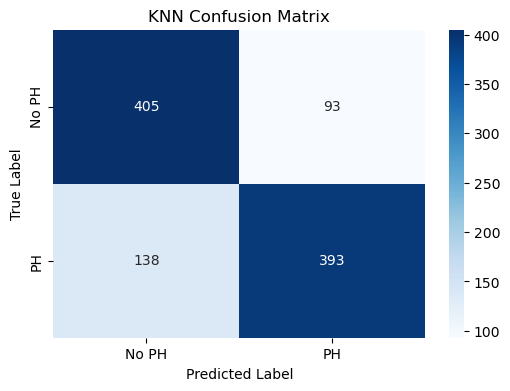

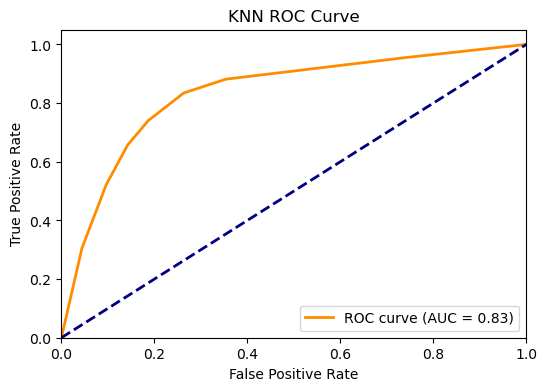


== SVM Model ==
Accuracy: 0.8066083576287658
AUC: 0.8498286933042906
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       498
           1       0.82      0.80      0.81       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



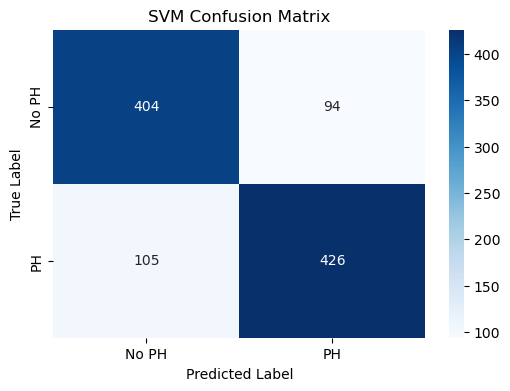

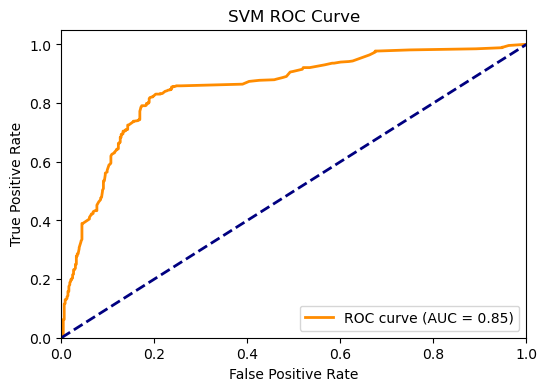


== RF Model ==
Accuracy: 0.8036929057337221
AUC: 0.87927226797964
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       498
           1       0.82      0.79      0.81       531

    accuracy                           0.80      1029
   macro avg       0.80      0.80      0.80      1029
weighted avg       0.80      0.80      0.80      1029



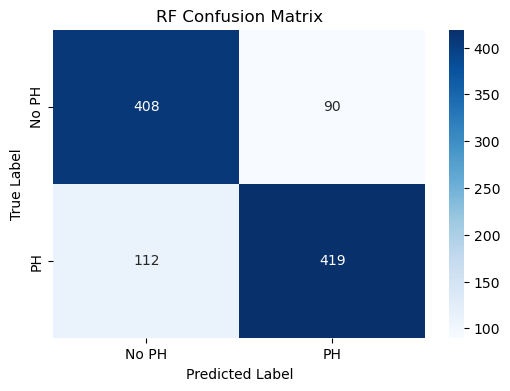

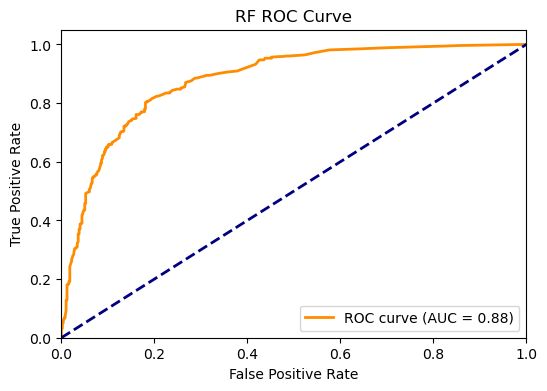

In [98]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 12

In [109]:
top_12_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction',
    'Hypercholesterolemia',
    'Ischaemic heart disease',
    'Chronic kidney disease',
    'Asthma',
    'Sleep apnoea'
]

In [110]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_12_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 12)
Testing set size: (1029, 12)
Overlap in Participant ID column: set()


In [111]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [112]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 9}
Best SVM Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 300}



== KNN Model ==
Accuracy: 0.782312925170068
AUC: 0.8398244579069574
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       498
           1       0.82      0.74      0.78       531

    accuracy                           0.78      1029
   macro avg       0.78      0.78      0.78      1029
weighted avg       0.79      0.78      0.78      1029



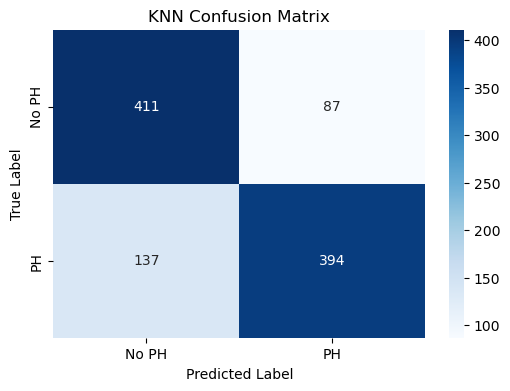

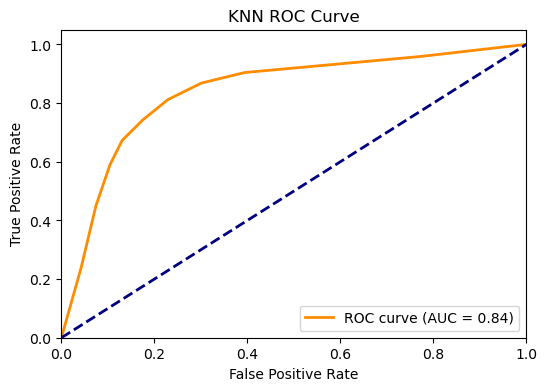


== SVM Model ==
Accuracy: 0.815354713313897
AUC: 0.8778466029844425
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       498
           1       0.82      0.82      0.82       531

    accuracy                           0.82      1029
   macro avg       0.82      0.82      0.82      1029
weighted avg       0.82      0.82      0.82      1029



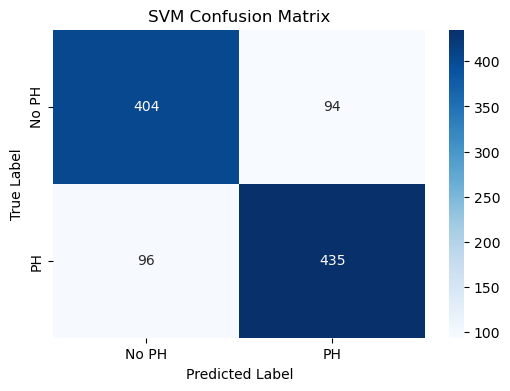

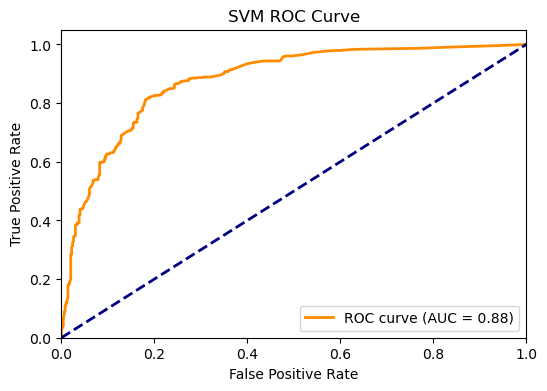


== RF Model ==
Accuracy: 0.7949465500485908
AUC: 0.8786067055415636
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       498
           1       0.83      0.76      0.79       531

    accuracy                           0.79      1029
   macro avg       0.80      0.80      0.79      1029
weighted avg       0.80      0.79      0.79      1029



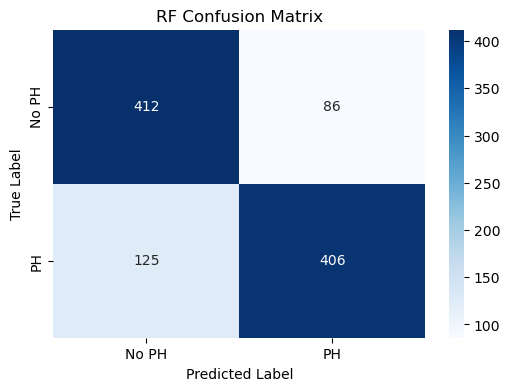

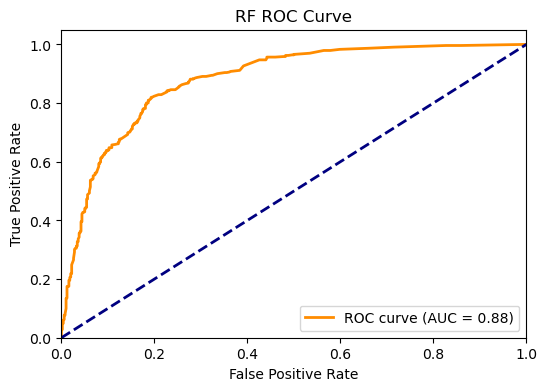

In [113]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

Top 13

In [114]:
top_13_features = [
    'Left heart failure',
    'Atrial fibrillation',
    'Valvular disease',
    'COPD',
    'Restrictive airway disease',
    'Pulmonary embolism',
    'Myocardial infarction',
    'Hypercholesterolemia',
    'Ischaemic heart disease',
    'Chronic kidney disease',
    'Asthma',
    'Sleep apnoea',
    'Chronic liver disease'
]

In [115]:
# 1. Load and Preprocess Data
df_matched = pd.read_csv("Matched_Cohort.csv")

# One-Hot Encode 'Sex' and 'Ethnicity'
df_encoded = pd.get_dummies(df_matched, columns=['Sex', 'Ethnicity'], drop_first=True)

# Define features and target
X = df_encoded[top_13_features]
y = df_encoded['PH']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Check overlap (optional step)
train_ids = set(df_matched.loc[X_train.index, "Participant ID"])
test_ids = set(df_matched.loc[X_test.index, "Participant ID"])
print("Overlap in Participant ID column:", train_ids.intersection(test_ids))

Training set size: (4113, 13)
Testing set size: (1029, 13)
Overlap in Participant ID column: set()


In [116]:
# 2. Define Parameter Grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20]
}

In [117]:
# 3. Perform Grid Search for each model

# KNN
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# SVM
svm = SVC(probability=True, random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Random Forest
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)

Best KNN Parameters: {'n_neighbors': 9}
Best SVM Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 5, 'n_estimators': 200}



== KNN Model ==
Accuracy: 0.7803692905733722
AUC: 0.8443642744234944
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       498
           1       0.81      0.74      0.78       531

    accuracy                           0.78      1029
   macro avg       0.78      0.78      0.78      1029
weighted avg       0.78      0.78      0.78      1029



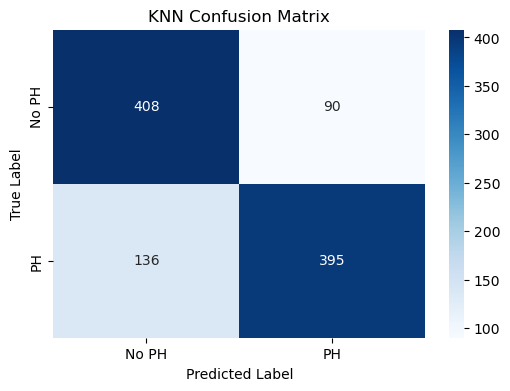

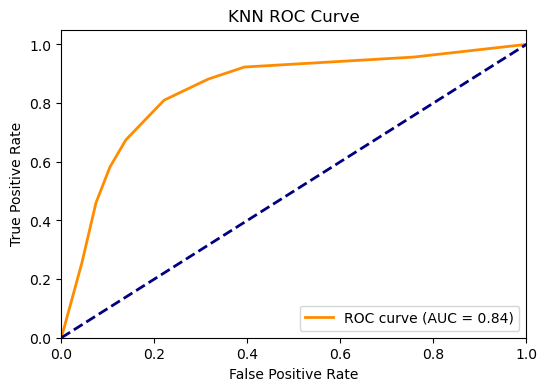


== SVM Model ==
Accuracy: 0.8134110787172012
AUC: 0.8779430339058684
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       498
           1       0.82      0.82      0.82       531

    accuracy                           0.81      1029
   macro avg       0.81      0.81      0.81      1029
weighted avg       0.81      0.81      0.81      1029



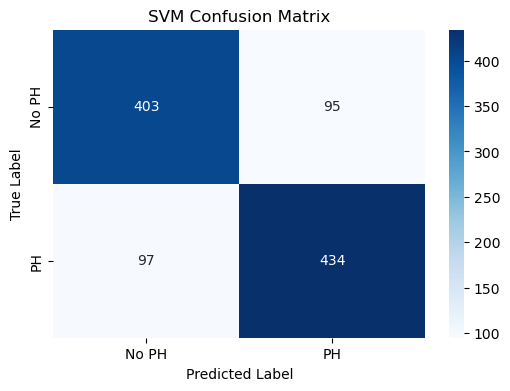

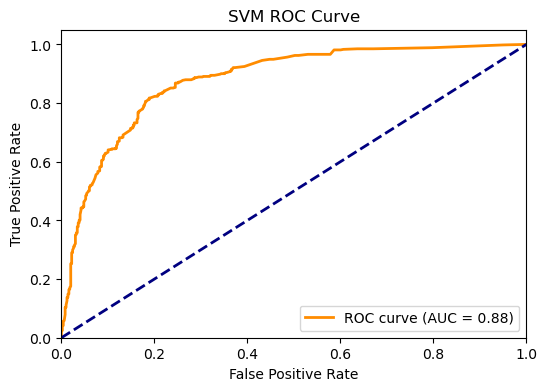


== RF Model ==
Accuracy: 0.7998056365403304
AUC: 0.8795539975343936
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       498
           1       0.83      0.77      0.80       531

    accuracy                           0.80      1029
   macro avg       0.80      0.80      0.80      1029
weighted avg       0.80      0.80      0.80      1029



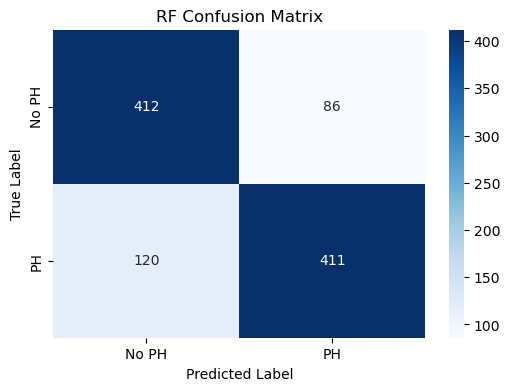

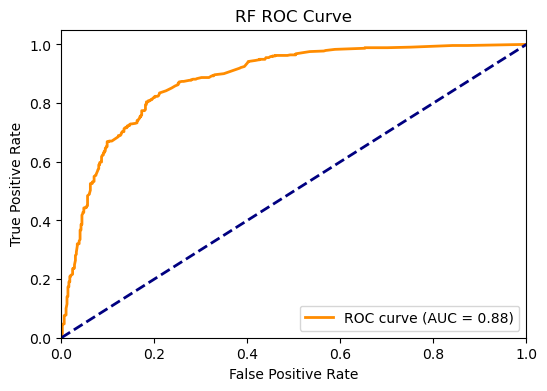

In [118]:
models = {
    "KNN": best_knn,
    "SVM": best_svm,
    "RF": best_rf
}

for name, model in models.items():
    model.fit(X_train, y_train)  
    
    # predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    print(f"\n== {name} Model ==")
    print("Accuracy:", accuracy)
    print("AUC:", auc_score)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrices
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No PH", "PH"], yticklabels=["No PH", "PH"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
now i want to do this section but with the best model, this si the previous code for when i thought random forest was the best but now that its svm on 9 features i want to do the same thing for the svm
